In [2]:
from sklearn import model_selection, linear_model, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/85567/_3afd3252820d8a4e1c5c9148bb0ec3a5_bike_sharing_demand.csv', header=0, sep=',')

In [69]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [70]:
data.shape

(10886, 12)

In [71]:
data.isnull().values.any()

False

In [72]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [74]:
data.datetime = data.datetime.apply(pd.to_datetime)

In [75]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [77]:
data['month'] = data.datetime.apply(lambda x : x.month)
data['hour'] = data.datetime.apply(lambda x : x.hour)

In [78]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [79]:
train_data = data[:-1000]
test_data = data[-1000:]

In [80]:
print(train_data.shape)

(9886, 14)


In [81]:
print(test_data.shape)

(1000, 14)


In [82]:
print(data.shape)

(10886, 14)


In [83]:
print(f"min_train: {train_data.datetime.min()},\nmax_train: {train_data.datetime.max()}")

min_train: 2011-01-01 00:00:00,
max_train: 2012-10-16 06:00:00


In [86]:
train_labels = train_data['count']
train_data = train_data.drop(['datetime', 'count'], axis=1)

In [87]:
test_labels = test_data['count']
test_data = test_data.drop(['count', 'datetime'], axis=1)

Text(0.5, 1.0, 'test_data')

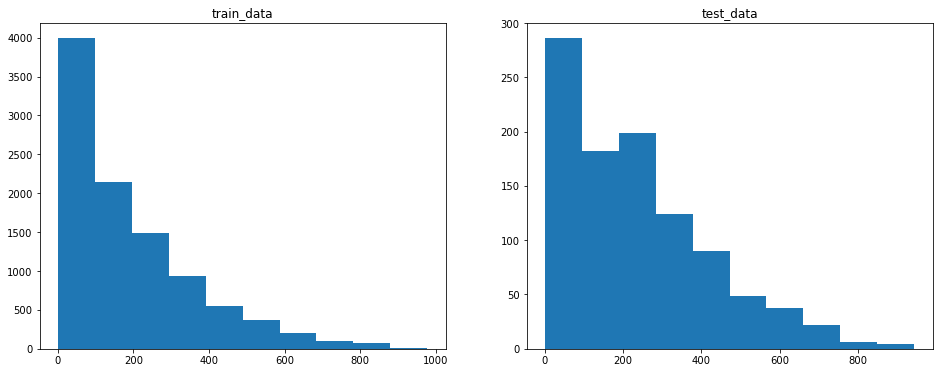

In [91]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(train_labels)
plt.title('train_data')

plt.subplot(1, 2, 2)
plt.hist(test_labels)
plt.title('test_data')

In [92]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [95]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [96]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [97]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


In [102]:
rg = linear_model.SGDRegressor(random_state=0)

In [103]:
rg.fit(train_data, train_labels)

SGDRegressor(random_state=0)

In [104]:
metrics.mean_absolute_error(test_labels, rg.predict(test_data))

32678333066101.652

In [105]:
print(test_labels[:10])

9886    525
9887    835
9888    355
9889    222
9890    228
9891    325
9892    328
9893    308
9894    346
9895    446
Name: count, dtype: int64


In [106]:
print(rg.predict(test_data)[:10])

[-8.15217468e+13 -1.27940348e+14 -5.15430820e+13 -2.29149119e+13
 -2.58255957e+13 -3.85635403e+13 -3.92648763e+13 -3.03104198e+13
 -4.03846575e+13 -5.57515848e+13]


In [107]:
rg.coef_

array([-2.30285477e+10, -5.87204402e+08, -1.27291755e+10, -1.27359409e+09,
        5.83730183e+10, -1.60478942e+11, -3.67459548e+10, -4.87006373e+09])

In [108]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [115]:
print(scaled_train_data)

[[-1.3783458  -1.13777997  1.00103498 ... -0.93010691 -1.55971876
  -1.6683207 ]
 [-1.4819523  -1.22603209  0.94948834 ... -0.8017532  -1.55971876
  -1.52373895]
 [-1.4819523  -1.22603209  0.94948834 ... -0.83553049 -1.55971876
  -1.3791572 ]
 ...
 [-0.44588732 -0.34641391  0.27938212 ... -0.97063966  1.23027756
  -1.08999371]
 [-0.44588732 -0.34641391  0.27938212 ... -0.70042132  1.23027756
  -0.94541196]
 [-0.44588732 -0.34641391  0.27938212 ...  0.11698915  1.23027756
  -0.80083021]]


In [122]:
rg.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, rg.predict(scaled_test_data))

0.042930483012407816

In [123]:
print(rg.predict(scaled_test_data)[:10])

[524.90958201 834.88816062 354.94091402 221.96933203 227.95283001
 324.96044934 327.966113   307.98463956 345.96942383 445.96231877]


In [124]:
print(rg.coef_)

[ 4.58902678e-01 -4.51836158e-01  6.62608792e-04 -1.40703258e-02
  5.08590377e+01  1.48008168e+02 -1.32281341e-03  7.59230341e-03]


In [127]:
print(list(map(lambda x : round(x, 2), rg.coef_)))

[0.46, -0.45, 0.0, -0.01, 50.86, 148.01, -0.0, 0.01]


In [128]:
for name, coef in zip(train_data.columns, list(map(lambda x : round(x, 2), rg.coef_))):
    print(f"{name}: {coef}")

temp: 0.46
atemp: -0.45
humidity: 0.0
windspeed: -0.01
casual: 50.86
registered: 148.01
month: -0.0
hour: 0.01


In [129]:
train_data

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0000,3,13,1,0
1,9.02,13.635,80,0.0000,8,32,1,1
2,9.02,13.635,80,0.0000,5,27,1,2
3,9.84,14.395,75,0.0000,3,10,1,3
4,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...
9881,18.04,21.970,67,8.9981,2,1,10,2
9882,17.22,21.210,67,7.0015,0,2,10,3
9883,17.22,21.210,67,11.0014,0,7,10,4
9884,17.22,21.210,67,16.9979,5,47,10,5


In [132]:
#По факту casual + registered = count
#Линейная зависимость
#Надо убрать одну из них, излишняя информация

In [138]:
(data['casual'] + data['registered'] != data['count']).any()

False

In [139]:
train_data.drop(['casual', 'registered'], axis=1, inplace=True)
test_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [141]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [142]:
rg.fit(scaled_train_data, train_labels)

SGDRegressor(random_state=0)

In [143]:
metrics.mean_absolute_error(test_labels, rg.predict(scaled_test_data))

121.8835371361759

In [144]:
for name, coef in zip(train_data.columns, list(map(lambda x : round(x, 2), rg.coef_))):
    print(f"{name}: {coef}")

temp: 30.01
atemp: 32.15
humidity: -42.28
windspeed: 3.78
month: 12.71
hour: 50.06


In [145]:
from sklearn.pipeline import Pipeline

In [146]:
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', rg)])

In [147]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

121.8835371361759